In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# Load the Model

In [24]:
model = tf.keras.models.load_model("plant_Disease_Trained_Model.keras")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                   

# Visualizing Single Image of Test Set

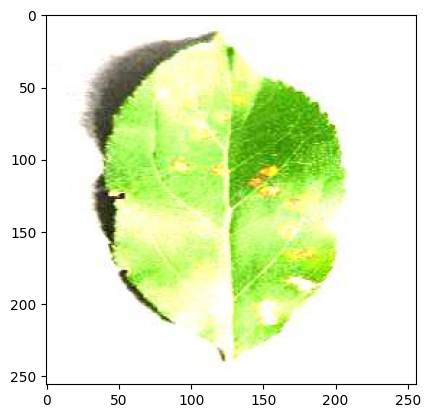

In [25]:
img_path = "test/test/AppleCedarRust1.JPG"
# Reading image
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Conver BGR image to RGB

# displaying img
plt.imshow(img)

# Testing Model

In [26]:
image = tf.keras.preprocessing.image.load_img(img_path, target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) # convert single image to a batch
input_arr.shape

(1, 128, 128, 3)

In [27]:
prediction = model.predict(input_arr)
prediction, prediction.shape

1/1 [==============================] - 0s 188ms/step


(array([[2.9419034e-09, 1.3913867e-12, 9.9999988e-01, 1.0640372e-12,
         2.2573519e-10, 1.2874871e-07, 2.7790655e-13, 1.1021748e-09,
         1.0452974e-12, 1.0058914e-12, 4.2536470e-15, 4.1890927e-10,
         9.9466052e-12, 6.4273526e-12, 1.3099926e-11, 4.5315138e-09,
         1.2644483e-08, 2.1583922e-11, 2.6318141e-09, 2.3659474e-09,
         1.4604382e-11, 6.3596947e-13, 2.4258071e-10, 5.9218730e-10,
         8.1995310e-14, 1.7167986e-10, 2.5444627e-12, 3.7433685e-12,
         8.8821102e-09, 1.5260443e-09, 5.3148035e-11, 3.6247940e-12,
         5.0896190e-11, 2.4698798e-14, 7.4826696e-09, 5.3427973e-10,
         1.2700063e-10, 7.8674414e-11]], dtype=float32),
 (1, 38))

In [28]:
result_index = np.argmax(prediction)
result_index

2

In [29]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

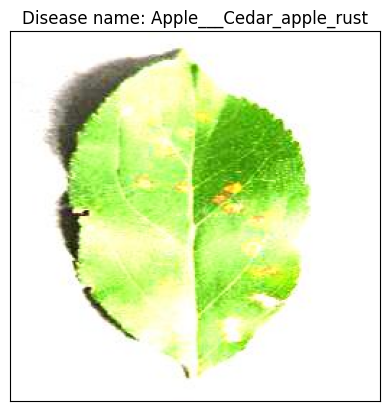

In [30]:
# Displaying result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f'Disease name: {model_prediction}')
plt.xticks([])
plt.yticks([])
plt.show()